In [1]:
def sequential_search(lst, value):
    if len(lst) == 0:
        print('Empty list')
        return
    for idx in range(len(lst)):
        if lst[idx] == value:
            return idx
    return None
        

def binary_search(lst, value):
    '''Input list must be sorted!'''
    if len(lst) == 0:
        print('Empty list')
        return
    
    left = 0
    right = len(lst) - 1
    mid = (right + left) // 2
    
    while right >= left:
        if lst[mid] == value:
            return mid
        elif lst[mid] > value:
            right = mid - 1
            mid = (right + left) // 2
        else: # lst[mid] < value
            left = mid + 1
            mid = (right + left) // 2
    return None

In [2]:
test_list = [0, 2, 4, 6, 8, 10]
value = 6

print(sequential_search(test_list, value))  # 3
print(binary_search(test_list, value))  # 3

test_list = [0, 2, 4, 7, 8, 10]

print(sequential_search(test_list, value))  # None
print(binary_search(test_list, value))  # None

3
3
None
None


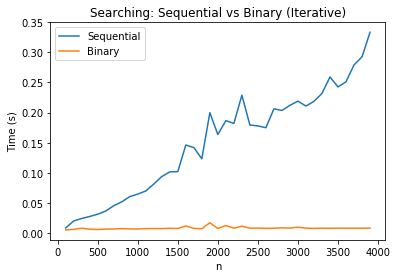

In [4]:
from timeit import Timer
from matplotlib import pyplot as plt
import random


seq_times = []
bin_times = []
for length in range(100, 4000, 100):
    test_list = list(range(length))
    
    bin_timer = Timer('binary_search(test_list, random.randrange({}))'.format(length),
                      'from __main__ import binary_search, test_list, random')
    seq_timer = Timer('sequential_search(test_list, random.randrange({}))'.format(length),
                      'from __main__ import sequential_search, test_list, random')
    seq_time = seq_timer.timeit(number=2000)
    bin_time = bin_timer.timeit(number=2000)
    seq_times.append(seq_time)
    bin_times.append(bin_time)
    
plt.plot(range(100, 4000, 100), seq_times, label='Sequential')
plt.plot(range(100, 4000, 100), bin_times, label='Binary')
plt.title('Searching: Sequential vs Binary (Iterative)')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

| Search | Complexity |
|------------|--------|
| Sequential | $O(n)$ |
| Binary | $O(\log(n))$ |